In [1]:
import pandas as pd
bike_rentals=pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


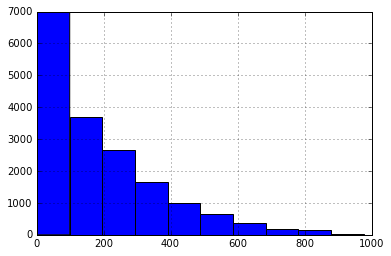

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

bike_rentals['cnt'].hist()

In [3]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


The temperature, adjusted temperature and hour of the day are most strongly correlated with the number of bikes rented. 

In [4]:
def assign_label(hour):
    if (hour>=6) and (hour<=12):
        return 1
    elif (hour>=12) and (hour<=18):
        return 2
    elif (hour>=18) and (hour<=24):
        return 3
    else: 
        return 4
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)    

# Choosing an error metric to quantify accuracy of the machine learning algorithm

As the 'cnt' coulmn of the bike_rentals dataset has integer values ranging from 0 to close to 1000, the mean squared error metric would be useful in evaluating the accuracy of the predictions vs the actual value of cnt. 

In [5]:
# Create training dataset
train=bike_rentals.sample(frac=0.8)

In [6]:
# Create testing dataset
test=bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [7]:
# Create list of columns to train the machine learning model on. 
columns=list(bike_rentals.columns)
#The 'casual' and 'registered' columns must be removed as 'cnt' value is derived from them.
# The 'cnt' column must be removed as that is the colums we are trying to predict. 
# The 'dteday' column must be removed as it contains datetimestamps and not real numbers. 
columns.remove('cnt')
columns.remove('casual')
columns.remove('dteday')
columns.remove('registered')
print(columns)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']


In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[columns],train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
predictions=lr.predict(test[columns])

In [11]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test['cnt'], predictions)
print(error)

17393.8628009


In [12]:
print(predictions)

[-105.29131439  -86.81660687  127.68645201 ...,  206.68392373  165.17355686
  180.14748565]


In [13]:
print(test['cnt'])

2         32
3         13
13        94
16        93
17        67
22        28
28         3
29         2
44        31
48         2
50         3
51        30
56        51
60        72
66        52
69         5
72         2
79        57
85       212
87       112
88        54
95         2
99       195
109      169
111       89
112       43
114       19
116        4
128       70
134       69
        ... 
17256     20
17264     11
17265     45
17272    118
17273    119
17284      9
17288     15
17291    239
17292    191
17294    178
17295    222
17298    225
17301    213
17302    128
17305     62
17307     26
17313      7
17322    129
17334     15
17338     13
17339     33
17341    122
17342    136
17346    138
17356     19
17363    196
17369    247
17373    122
17376     90
17377     61
Name: cnt, dtype: int64


A large dsicpreancy between the actual and predicted values exist. This shows that the linear regression model in its current form very poorly predicts the actual outcome.

In [14]:
# Construct decision tree with default parameters

from sklearn.tree import DecisionTreeRegressor


dtr=DecisionTreeRegressor()
dtr.fit(train[columns],train['cnt'])
predictions_dtr=dtr.predict(test[columns])

error_dtr=mean_squared_error(test['cnt'],predictions_dtr)
print(error_dtr)

3227.34493671


In [15]:
# Construct a decison tree wiht min_samples_leaf=10

dtr2=DecisionTreeRegressor(min_samples_leaf=10)
dtr2.fit(train[columns],train['cnt'])
predictions_dtr2=dtr2.predict(test[columns])

error_dtr2=mean_squared_error(test['cnt'],predictions_dtr2)
print(error_dtr2)

3214.97619091


In [16]:
# Construct a decison tree wiht min_samples_leaf=5

dtr3=DecisionTreeRegressor(min_samples_leaf=5)
dtr3.fit(train[columns],train['cnt'])
predictions_dtr3=dtr3.predict(test[columns])

error_dtr3=mean_squared_error(test['cnt'],predictions_dtr3)
print(error_dtr3)

2936.37995048


In [36]:
# Construct a decison tree wiht min_samples_leaf=3

dtr4=DecisionTreeRegressor(min_samples_leaf=3)
dtr4.fit(train[columns],train['cnt'])
predictions_dtr4=dtr4.predict(test[columns])

error_dtr4=mean_squared_error(test['cnt'],predictions_dtr4)
print(error_dtr4)

3024.08293864


# Effect of tweaking decision tree min_samples_leaf parameter

Three decision trees with values of min_samples_leaf = 3,5 and 10 were constructed, trained and tested with the test dataset to measure the accuracy of the predicitons. The tree with min_samples_leaf=5 produced the lowest error. Values above and below 5 (2 and 10) produced higher error values, indicating that min_samples_leaf=5 is a good method of 'pruning' the tree. 

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(train[columns],train['cnt'])
predictions_rfr=rfr.predict(test[columns])
error_rfr=mean_squared_error(test['cnt'],predictions_rfr)
print(error_rfr)

2160.67495109


In [39]:
# Change min_samples_leaf to 5

rfr2=RandomForestRegressor(min_samples_leaf=5)
rfr2.fit(train[columns],train['cnt'])
predictions_rfr2=rfr2.predict(test[columns])
error_rfr2=mean_squared_error(test['cnt'],predictions_rfr2)
print(error_rfr2)

2309.14642016


Changing the min_samples_leaf value to 5 increased the error for the random forests model. This is in contrast with the decrease in the error when the min_samples_leaf was changed to 5 for the decision tree model. 

In [37]:
# Change min_samples_split to 4

rfr3=RandomForestRegressor(min_samples_split=4)
rfr3.fit(train[columns],train['cnt'])
predictions_rfr3=rfr3.predict(test[columns])
error_rfr3=mean_squared_error(test['cnt'],predictions_rfr3)
print(error_rfr3)

2143.17562203


In [ ]:
Changing the 